<a href="https://colab.research.google.com/github/maeve70/SentimentAnalysis/blob/main/NYRep%26SensTwitterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I decided to follow my Congressman, Jerry Nadler, and two Senators-- Chuck Schumer, & Kirsten Gillibrand on Twitter. The applet on IFTTT (not created by me) tracked the accounts and put the tweets, and a link to the tweets into a Google Sheet and was updated multiple times per day. 

I created a couple data vizzes in Tableau with the information as well. I had other sheets with different years too. I wanted to be able to see daily frequency of tweets, ability to search by keyword parameters, etc. 

These tweets are from around March 2019 - Feb/March 2021 for the three of them.

Public Tableau:

https://public.tableau.com/app/profile/lisa3690/viz/NYSensRepupdated/WeeklyTweetTotals


and, 3/14/17- 9/1/18:

https://public.tableau.com/app/profile/lisa3690/viz/NYSensRepTweets/DailyFrequency

I wanted to try out Vader. What is below is me learning how to use Vader to analyze the sentiments of the tweets. I'm not sure what I'll find. It's all a learning process and a WIP! :)

Vader: Valence Aware Dictionary for Sentiment Reasoning


In [1]:
import pandas as pd
import seaborn as sns;
from matplotlib import pyplot as plt
import numpy as np
import nltk
import nltk.corpus
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
!python --version

Python 3.7.15


In [3]:
!python3.8.1 setup.py


/bin/bash: python3.8.1: command not found


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/maeve70/csvfiles/main/NY%20Rep%26Sens-test%20-%20All%20NY%20.csv')

In [5]:
df.head()

,User,Tweet,Link to Tweet,Date
0,@SenSchumer,I’m so proud to stand here with everyone at #G...,http://twitter.com/SenSchumer/status/117808701...,"September 28, 2019 at 07:20PM"
1,@SenSchumer,RT @HRC: Proud to welcome Senate Minority Lead...,http://twitter.com/SenSchumer/status/117812451...,"September 28, 2019 at 09:49PM"
2,@SenSchumer,"RT @HRC: @SenSchumer ""We must continue to shin...",http://twitter.com/SenSchumer/status/117812665...,"September 28, 2019 at 09:57PM"
3,@SenSchumer,Officer Brian Mulkeen was killed in the line o...,http://twitter.com/SenSchumer/status/117831947...,"September 29, 2019 at 10:43AM"
4,@SenSchumer,"It’s amazing to get to share Buffalo food, sto...",http://twitter.com/SenSchumer/status/117833205...,"September 29, 2019 at 11:33AM"


In [6]:
df.tail()

,User,Tweet,Link to Tweet,Date
8887,@RepJerryNadler,RT @HouseDemocrats: American manufacturing job...,https://twitter.com/RepJerryNadler/status/1489...,"February 04, 2022 at 11:31AM"
8888,@RepJerryNadler,@HouseDemocrats just passed the #AmericaCOMPET...,https://twitter.com/RepJerryNadler/status/1489...,"February 04, 2022 at 12:00PM"
8889,@RepJerryNadler,"I’m particularly proud that the SHOP SAFE Act,...",https://twitter.com/RepJerryNadler/status/1489...,"February 04, 2022 at 12:00PM"
8890,@RepJerryNadler,"Legislation to help ensure that more women, pe...",https://twitter.com/RepJerryNadler/status/1489...,"February 04, 2022 at 12:00PM"
8891,@RepJerryNadler,These proposals are top priorities for @HouseJ...,https://twitter.com/RepJerryNadler/status/1489...,"February 04, 2022 at 12:00PM"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User           8892 non-null   object
 1   Tweet          8892 non-null   object
 2   Link to Tweet  8889 non-null   object
 3   Date           8892 non-null   object
dtypes: object(4)
memory usage: 278.0+ KB


In [8]:
#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'])
df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   User           8892 non-null   object        
 1   Tweet          8892 non-null   object        
 2   Link to Tweet  8889 non-null   object        
 3   Date           8892 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 278.0+ KB


In [10]:
df.head()

,User,Tweet,Link to Tweet,Date
0,@SenSchumer,I’m so proud to stand here with everyone at #G...,http://twitter.com/SenSchumer/status/117808701...,2019-09-28 19:20:00
1,@SenSchumer,RT @HRC: Proud to welcome Senate Minority Lead...,http://twitter.com/SenSchumer/status/117812451...,2019-09-28 21:49:00
2,@SenSchumer,"RT @HRC: @SenSchumer ""We must continue to shin...",http://twitter.com/SenSchumer/status/117812665...,2019-09-28 21:57:00
3,@SenSchumer,Officer Brian Mulkeen was killed in the line o...,http://twitter.com/SenSchumer/status/117831947...,2019-09-29 10:43:00
4,@SenSchumer,"It’s amazing to get to share Buffalo food, sto...",http://twitter.com/SenSchumer/status/117833205...,2019-09-29 11:33:00


In [11]:
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')

In [12]:
df.head()

,User,Tweet,Link to Tweet,Date
0,@SenSchumer,I’m so proud to stand here with everyone at #G...,http://twitter.com/SenSchumer/status/117808701...,09-28-2019
1,@SenSchumer,RT @HRC: Proud to welcome Senate Minority Lead...,http://twitter.com/SenSchumer/status/117812451...,09-28-2019
2,@SenSchumer,"RT @HRC: @SenSchumer ""We must continue to shin...",http://twitter.com/SenSchumer/status/117812665...,09-28-2019
3,@SenSchumer,Officer Brian Mulkeen was killed in the line o...,http://twitter.com/SenSchumer/status/117831947...,09-29-2019
4,@SenSchumer,"It’s amazing to get to share Buffalo food, sto...",http://twitter.com/SenSchumer/status/117833205...,09-29-2019


In [13]:
df.tail()

,User,Tweet,Link to Tweet,Date
8887,@RepJerryNadler,RT @HouseDemocrats: American manufacturing job...,https://twitter.com/RepJerryNadler/status/1489...,02-04-2022
8888,@RepJerryNadler,@HouseDemocrats just passed the #AmericaCOMPET...,https://twitter.com/RepJerryNadler/status/1489...,02-04-2022
8889,@RepJerryNadler,"I’m particularly proud that the SHOP SAFE Act,...",https://twitter.com/RepJerryNadler/status/1489...,02-04-2022
8890,@RepJerryNadler,"Legislation to help ensure that more women, pe...",https://twitter.com/RepJerryNadler/status/1489...,02-04-2022
8891,@RepJerryNadler,These proposals are top priorities for @HouseJ...,https://twitter.com/RepJerryNadler/status/1489...,02-04-2022


In [14]:
#checking different rows for date formats
df.iloc[[20, 500, 1000, 3000, 6000, 8000]]

,User,Tweet,Link to Tweet,Date
20,@SenSchumer,The report from the @SenateFinance Democrats s...,http://twitter.com/SenSchumer/status/117951573...,10-02-2019
500,@SenSchumer,Congrats to everyone who ran the #JingleBellJo...,http://twitter.com/SenSchumer/status/120590611...,12-14-2019
1000,@SenSchumer,"Yesterday, I called on FERC not to undermine N...",http://twitter.com/SenSchumer/status/123062430...,02-20-2020
3000,@SenSchumer,To call this process illegitimate is being too...,http://twitter.com/SenSchumer/status/131932348...,10-22-2020
6000,@SenGillibrand,I was proud to pass the Stock Act to make this...,http://twitter.com/SenGillibrand/status/133715...,12-10-2020
8000,@RepJerryNadler,Each of these extremist views should be disqua...,http://twitter.com/RepJerryNadler/status/13167...,10-15-2020


In [15]:
df.describe()

,User,Tweet,Link to Tweet,Date
count,8892,8892,8889,8892
unique,3,8839,8884,1011
top,@SenSchumer,RT @RepJerryNadler: The best way to fight the ...,http://twitter.com/SenSchumer/status/132257057...,01-23-2020
freq,4000,8,2,80


In [16]:
df.isnull().sum()

User             0
Tweet            0
Link to Tweet    3
Date             0
dtype: int64

In [17]:
df['User'].value_counts()

@SenSchumer        4000
@SenGillibrand     2892
@RepJerryNadler    2000
Name: User, dtype: int64

In [18]:
df['Date'].value_counts()

01-23-2020    80
06-27-2019    59
01-20-2021    42
07-28-2020    36
11-07-2020    33
              ..
04-26-2021     1
01-08-2022     1
04-18-2021     1
12-31-2021     1
11-22-2021     1
Name: Date, Length: 1011, dtype: int64

In [19]:
#how to find min/max years
#df['Date'].agg(['min', 'max']) #goes by month not day or year

Sentiment Intensity Analyzer, sid classifies a string into 1 of 4 categories:

- negative
- neutral
- positive
- compound (computed by normalizing the scores above)

In [20]:
#test sid analyzer c & d are actual drumpf tweets

a= "This is a good movie."
b= "This movie is awful!"
c = "We're about to create millions of good, high-paying union jobs. I'm fighting to make sure that every American has a fair shot at getting those jobs."
d= "Eight people were killed in a mass shooting in Atlanta last night — the majority of them Asian women. My heart is with their families. This has to stop. We must condemn the bigotry and hatred that fuels horrific violence and stand with our AAPI neighbors. #StopAsianHate"
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [21]:
sid.polarity_scores(b)

{'neg': 0.523, 'neu': 0.477, 'pos': 0.0, 'compound': -0.5093}

In [22]:
sid.polarity_scores(c)

{'neg': 0.078, 'neu': 0.623, 'pos': 0.299, 'compound': 0.7269}

In [23]:
sid.polarity_scores(d)

{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.9719}

The scores range from:

- most extreme negative, -1

- most extreme positive, 1

- neutral, 0

See the readme: 
https://github.com/cjhutto/vaderSentiment

In [24]:
#Let's create a col called scores to analyze tweets with scores as a dictionary (as above)
df['scores'] = df['Tweet'].apply(lambda Tweet: sid.polarity_scores(Tweet))

df.head()

,User,Tweet,Link to Tweet,Date,scores
0,@SenSchumer,I’m so proud to stand here with everyone at #G...,http://twitter.com/SenSchumer/status/117808701...,09-28-2019,"{'neg': 0.123, 'neu': 0.606, 'pos': 0.271, 'co..."
1,@SenSchumer,RT @HRC: Proud to welcome Senate Minority Lead...,http://twitter.com/SenSchumer/status/117812451...,09-28-2019,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp..."
2,@SenSchumer,"RT @HRC: @SenSchumer ""We must continue to shin...",http://twitter.com/SenSchumer/status/117812665...,09-28-2019,"{'neg': 0.143, 'neu': 0.809, 'pos': 0.048, 'co..."
3,@SenSchumer,Officer Brian Mulkeen was killed in the line o...,http://twitter.com/SenSchumer/status/117831947...,09-29-2019,"{'neg': 0.102, 'neu': 0.543, 'pos': 0.355, 'co..."
4,@SenSchumer,"It’s amazing to get to share Buffalo food, sto...",http://twitter.com/SenSchumer/status/117833205...,09-29-2019,"{'neg': 0.048, 'neu': 0.813, 'pos': 0.138, 'co..."


Create a column that will compoud the scores into positive or negative from the scores dictionary.

*Note: You can view the whole tweet if you use the "magic wand" icon in the Colab notebook which converts the table into an interactive table. *

In [25]:
#Let's separate out compound score into it's own column.
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,User,Tweet,Link to Tweet,Date,scores,compound
0,@SenSchumer,I’m so proud to stand here with everyone at #G...,http://twitter.com/SenSchumer/status/117808701...,09-28-2019,"{'neg': 0.123, 'neu': 0.606, 'pos': 0.271, 'co...",0.7960
1,@SenSchumer,RT @HRC: Proud to welcome Senate Minority Lead...,http://twitter.com/SenSchumer/status/117812451...,09-28-2019,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7269
2,@SenSchumer,"RT @HRC: @SenSchumer ""We must continue to shin...",http://twitter.com/SenSchumer/status/117812665...,09-28-2019,"{'neg': 0.143, 'neu': 0.809, 'pos': 0.048, 'co...",-0.7357
3,@SenSchumer,Officer Brian Mulkeen was killed in the line o...,http://twitter.com/SenSchumer/status/117831947...,09-29-2019,"{'neg': 0.102, 'neu': 0.543, 'pos': 0.355, 'co...",0.8807
4,@SenSchumer,"It’s amazing to get to share Buffalo food, sto...",http://twitter.com/SenSchumer/status/117833205...,09-29-2019,"{'neg': 0.048, 'neu': 0.813, 'pos': 0.138, 'co...",0.6239


In [26]:
#We need to see whether the overall sentiment is positive or negative.
#add a column for a compound score

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,User,Tweet,Link to Tweet,Date,scores,compound,comp_score
0,@SenSchumer,I’m so proud to stand here with everyone at #G...,http://twitter.com/SenSchumer/status/117808701...,09-28-2019,"{'neg': 0.123, 'neu': 0.606, 'pos': 0.271, 'co...",0.7960,pos
1,@SenSchumer,RT @HRC: Proud to welcome Senate Minority Lead...,http://twitter.com/SenSchumer/status/117812451...,09-28-2019,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7269,pos
2,@SenSchumer,"RT @HRC: @SenSchumer ""We must continue to shin...",http://twitter.com/SenSchumer/status/117812665...,09-28-2019,"{'neg': 0.143, 'neu': 0.809, 'pos': 0.048, 'co...",-0.7357,neg
3,@SenSchumer,Officer Brian Mulkeen was killed in the line o...,http://twitter.com/SenSchumer/status/117831947...,09-29-2019,"{'neg': 0.102, 'neu': 0.543, 'pos': 0.355, 'co...",0.8807,pos
4,@SenSchumer,"It’s amazing to get to share Buffalo food, sto...",http://twitter.com/SenSchumer/status/117833205...,09-29-2019,"{'neg': 0.048, 'neu': 0.813, 'pos': 0.138, 'co...",0.6239,pos


In [27]:
df['comp_score'].value_counts()

pos    5747
neg    3145
Name: comp_score, dtype: int64

In [28]:
df[['compound', 'User']].groupby('User').mean()

,compound
User,
@RepJerryNadler,0.092529
@SenGillibrand,0.223161
@SenSchumer,0.103427


In [29]:
df[['compound', 'User']].groupby('User').median()

,compound
User,
@RepJerryNadler,0.12800
@SenGillibrand,0.37515
@SenSchumer,0.16015


In [30]:
df[['compound', 'User']].groupby('User').std()

,compound
User,
@RepJerryNadler,0.603432
@SenGillibrand,0.587109
@SenSchumer,0.573371


In [31]:
df[['comp_score', 'User']].groupby('User').count()

,comp_score
User,
@RepJerryNadler,2000
@SenGillibrand,2892
@SenSchumer,4000


In [32]:
sns.__version__

'0.11.2'

In [33]:
#do this when you can't remember the palette choices!
sns.set_palette('blah')

ValueError: ignored

In [34]:
df.head(2)

,User,Tweet,Link to Tweet,Date,scores,compound,comp_score
0,@SenSchumer,I’m so proud to stand here with everyone at #G...,http://twitter.com/SenSchumer/status/117808701...,09-28-2019,"{'neg': 0.123, 'neu': 0.606, 'pos': 0.271, 'co...",0.7960,pos
1,@SenSchumer,RT @HRC: Proud to welcome Senate Minority Lead...,http://twitter.com/SenSchumer/status/117812451...,09-28-2019,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7269,pos


Let's do some visualizations.

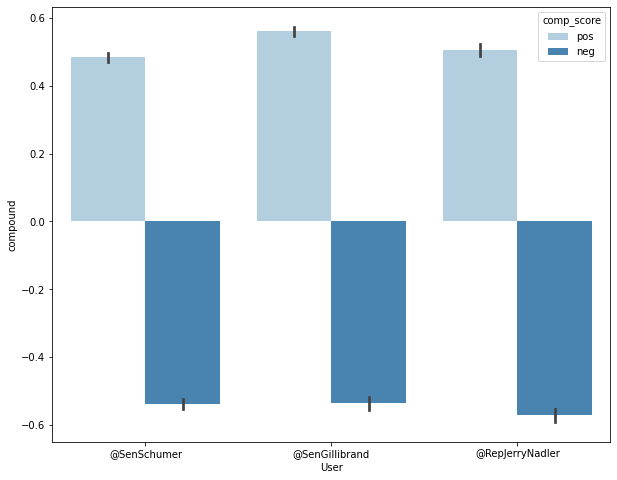

In [35]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'User', y='compound', hue='comp_score', palette='Blues', data=df);

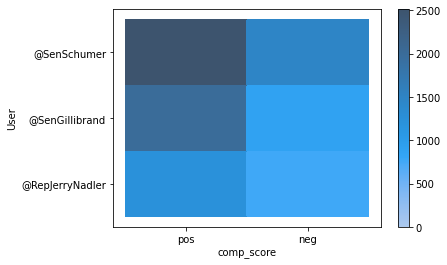

In [36]:

sns.histplot(x='comp_score', y='User', cbar=True, data=df);

color palettes:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm...

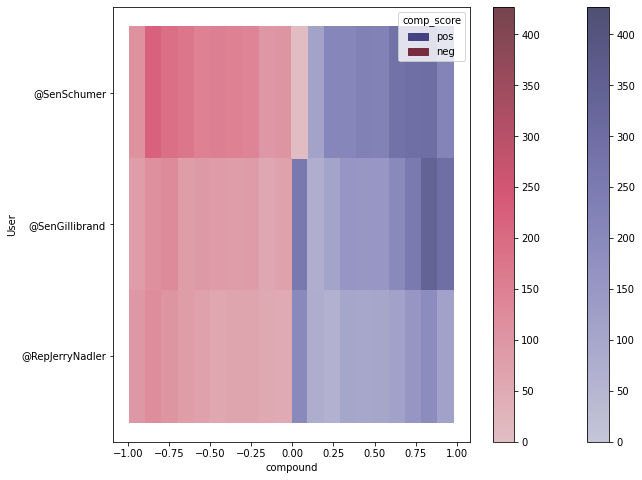

In [37]:
plt.figure(figsize=(10, 8))

sns.histplot(x='compound', y='User', 
             hue='comp_score', cbar=True, palette='icefire', data=df);

- adding the shrink arg gives you space between the bars.
- also using the palette arg to change the color of the plot

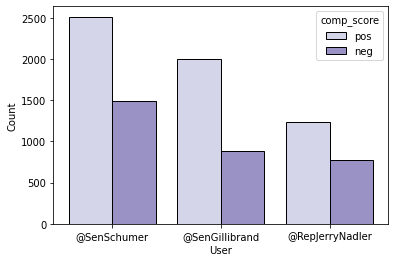

In [38]:
sns.histplot(x='User', hue='comp_score', multiple='dodge', palette='Purples',
             data=df, shrink=0.8); 

I think you can see the differences better with this one.

In [39]:
sns.set_palette("cool")

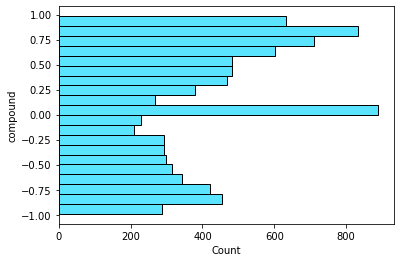

In [40]:
sns.histplot(y = 'compound', palette='BuGn', data=df); #use x or y too

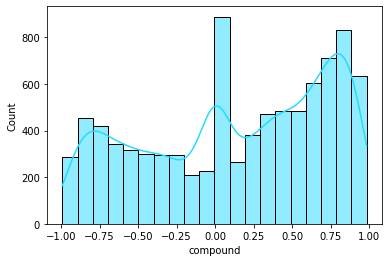

In [42]:
sns.histplot(df.compound, kde=True, bins=20); #add more bins to get a more granular view.

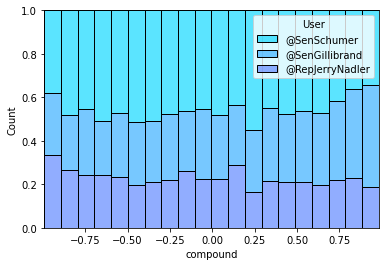

In [43]:
sns.histplot(x='compound', hue='User', stat='count', 
             multiple='fill', data=df);

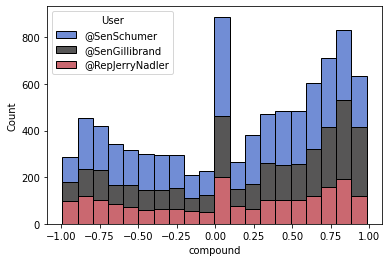

In [45]:
sns.histplot(x='compound', hue='User', stat='count', 
             multiple='stack', palette='icefire', data=df);

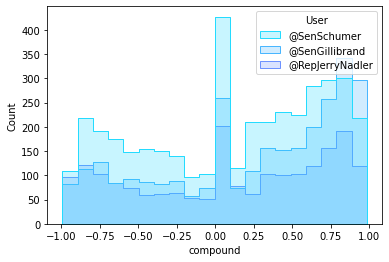

In [49]:
sns.histplot(x='compound', hue='User', element='step',data=df);

In [50]:
df['User'].value_counts()

@SenSchumer        4000
@SenGillibrand     2892
@RepJerryNadler    2000
Name: User, dtype: int64

So, there are more Schumer tweets b/c the date range is longer than that of Gillibrand and Nadler.

In [55]:
#AL_batting98_2008 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['League']== "AL").values]

Jerry = df[(df['User']== '@RepJerryNadler').values]
Jerry.head()

,User,Tweet,Link to Tweet,Date,scores,compound,comp_score
6892,@RepJerryNadler,This is a victory for thousands of New Yorkers...,http://twitter.com/RepJerryNadler/status/11990...,11-25-2019,"{'neg': 0.045, 'neu': 0.892, 'pos': 0.063, 'co...",0.2263,pos
6893,@RepJerryNadler,Don McGahn is a central witness to allegations...,http://twitter.com/RepJerryNadler/status/11991...,11-25-2019,"{'neg': 0.053, 'neu': 0.883, 'pos': 0.064, 'co...",0.1280,pos
6894,@RepJerryNadler,"As families gather for Thanksgiving, it’s unco...",http://twitter.com/RepJerryNadler/status/11994...,11-26-2019,"{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'comp...",-0.8750,neg
6895,@RepJerryNadler,#1millionKids across our nation shouldn't have...,http://twitter.com/RepJerryNadler/status/11994...,11-26-2019,"{'neg': 0.188, 'neu': 0.769, 'pos': 0.043, 'co...",-0.8020,neg
6896,@RepJerryNadler,One of my #Thanksgiving traditions is to volun...,http://twitter.com/RepJerryNadler/status/11997...,11-27-2019,"{'neg': 0.073, 'neu': 0.844, 'pos': 0.082, 'co...",0.1027,pos


In [58]:
Jerry['User'].value_counts()

@RepJerryNadler    2000
Name: User, dtype: int64

In [67]:
Jerry['comp_score'].value_counts()

pos    1232
neg     768
Name: comp_score, dtype: int64

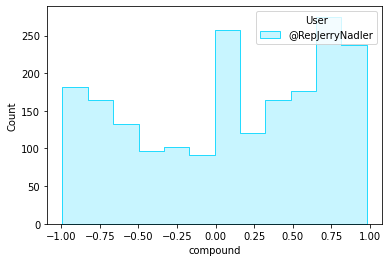

In [59]:
sns.histplot(x='compound', hue='User', element='step',data=Jerry);

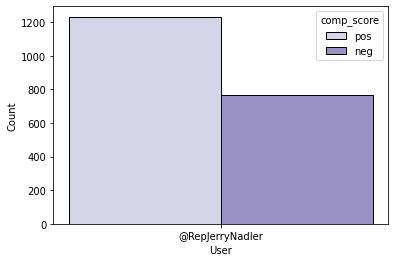

In [60]:
sns.histplot(x='User', hue='comp_score', multiple='dodge', palette='Purples',
             data=Jerry, shrink=0.8); 

In [63]:
kirsten = df[(df['User']== '@SenGillibrand').values] 
kirsten.head()

,User,Tweet,Link to Tweet,Date,scores,compound,comp_score
4000,@SenGillibrand,Families and kids face huge disparities in opp...,http://twitter.com/SenGillibrand/status/113154...,05-23-2019,"{'neg': 0.044, 'neu': 0.739, 'pos': 0.218, 'co...",0.8020,pos
4001,@SenGillibrand,This president is more ruthless toward transge...,http://twitter.com/SenGillibrand/status/113156...,05-23-2019,"{'neg': 0.244, 'neu': 0.662, 'pos': 0.094, 'co...",-0.7433,neg
4002,@SenGillibrand,Determining whether children have a fair shot ...,http://twitter.com/SenGillibrand/status/113157...,05-23-2019,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",0.3182,pos
4003,@SenGillibrand,RT @nprpolitics: Sen. Kirsten Gillibrand spoke...,http://twitter.com/SenGillibrand/status/113158...,05-23-2019,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
4004,@SenGillibrand,The politicians interfering in patients' acces...,http://twitter.com/SenGillibrand/status/113159...,05-23-2019,"{'neg': 0.084, 'neu': 0.847, 'pos': 0.069, 'co...",0.0900,pos


In [65]:
kirsten['User'].value_counts()

@SenGillibrand    2892
Name: User, dtype: int64

In [66]:
kirsten['comp_score'].value_counts()

pos    2003
neg     889
Name: comp_score, dtype: int64

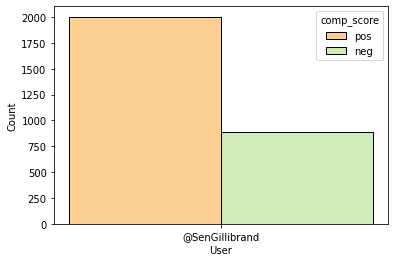

In [64]:
sns.histplot(x='User', hue='comp_score', multiple='dodge', palette='Spectral',
             data=kirsten, shrink=0.8); 

Again, I wasn't sure what I'd find here. This only captures a particular moment in time, March 2019 - Feb/March 2021. 
This was a fun exercise. I'll keep looking at it.